# Supervised Learning Regression Models


## Contents

[1. Collecting Individual Businesses in each city](#1.-Collecting-Individual-Businesses-in-each-city) <br>
[2. Collecting Affluence Data for each city](#2.-Collecting-Affluence-Data-for-each-city) <br>
[3. Aggregating businesses by city](#3.-Aggregating-businesses-by-city)<br>

### 1. Collecting Movie Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
import statsmodels.api as sm

In [2]:
#Read in data
df = pd.read_csv("C:\\Users\\taylo\\Desktop\\GA\\Capstone\\the-movies-dataset\\movies_metadata.csv")

C:\Users\taylo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


## 2. Data Cleaning

In [5]:
#Renaming Columns
df.rename(columns={'adult': 'Adult'}, inplace=True)
df.rename(columns={'belongs_to_collection': 'Belongs To Collection'}, inplace=True)
df.rename(columns={'budget': 'Budget'}, inplace=True)
df.rename(columns={'genres': 'Genres'}, inplace=True)
df.rename(columns={'homepage': 'Homepage'}, inplace=True)
df.rename(columns={'id': 'ID'}, inplace=True)
df.rename(columns={'imdb_id': 'IMDB_id'}, inplace=True)
df.rename(columns={'original_language': 'Original Language'}, inplace=True)
df.rename(columns={'original_title': 'Original Title'}, inplace=True)
df.rename(columns={'overview': 'Overview'}, inplace=True)
df.rename(columns={'popularity': 'Popularity'}, inplace=True)
df.rename(columns={'poster_path': 'Poster Path'}, inplace=True)
df.rename(columns={'production_companies': 'Production Companies'}, inplace=True)
df.rename(columns={'production_countries': 'Production Countries'}, inplace=True)
df.rename(columns={'release_date': 'Release Date'}, inplace=True)
df.rename(columns={'revenue': 'Revenue'}, inplace=True)
df.rename(columns={'runtime': 'Runtime'}, inplace=True)
df.rename(columns={'spoken_languages': 'Spoken Languages'}, inplace=True)
df.rename(columns={'status': 'Status'}, inplace=True)
df.rename(columns={'tagline': 'Tagline'}, inplace=True)
df.rename(columns={'title': 'Title'}, inplace=True)
df.rename(columns={'video': 'Video'}, inplace=True)
df.rename(columns={'vote_average': 'Vote Average'}, inplace=True)
df.rename(columns={'vote_count': 'Vote Count'}, inplace=True)

In [6]:
#Confirming columns rename
df.columns

Index(['Adult', 'Belongs To Collection', 'Budget', 'Genres', 'Homepage', 'ID',
       'IMDB_id', 'Original Language', 'Original Title', 'Overview',
       'Popularity', 'Poster Path', 'Production Companies',
       'Production Countries', 'Release Date', 'Revenue', 'Runtime',
       'Spoken Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Vote Average', 'Vote Count'],
      dtype='object')

In [7]:
df['Release Date'].dtype

dtype('O')

In [8]:
#Changing Release Date to Release Month
df['Month'] = pd.to_datetime(df['Release Date'],  errors='coerce').dt.month

In [9]:
#Adding in Release Month Column
df['Month'] = df['Month']

In [10]:
#Creating blank column for Season Released
df["Season Released"] = ""
df.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Runtime,Spoken Languages,Status,Tagline,Title,Video,Vote Average,Vote Count,Month,Season Released
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10.0,
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12.0,
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,12.0,
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,12.0,
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2.0,


In [11]:
#Mapping each Release Month to a season released 
df.loc[df.Month == 1.0, 'Season Released'] = '1' 
df.loc[df.Month == 2.0, 'Season Released'] = '1'
df.loc[df.Month == 3.0, 'Season Released'] = '2' 
df.loc[df.Month == 4.0, 'Season Released'] = '2' 
df.loc[df.Month == 5.0, 'Season Released'] = '2' 
df.loc[df.Month == 6.0, 'Season Released'] = '3' 
df.loc[df.Month == 7.0, 'Season Released'] = '3' 
df.loc[df.Month == 8.0, 'Season Released'] = '3' 
df.loc[df.Month == 9.0, 'Season Released'] = '4' 
df.loc[df.Month == 10.0, 'Season Released'] = '4' 
df.loc[df.Month == 11.0, 'Season Released'] = '4' 
df.loc[df.Month == 12.0, 'Season Released'] = '1' 

df.head()

,Adult,Belongs To Collection,Budget,Genres,Homepage,ID,IMDB_id,Original Language,Original Title,Overview,...,Runtime,Spoken Languages,Status,Tagline,Title,Video,Vote Average,Vote Count,Month,Season Released
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10.0,4
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,12.0,1
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,12.0,1
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,12.0,1
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,2.0,1


In [12]:
#Check nulls
df.isnull().sum()

Adult                        0
Belongs To Collection    40972
Budget                       0
Genres                       0
Homepage                 37684
ID                           0
IMDB_id                     17
Original Language           11
Original Title               0
Overview                   954
Popularity                   5
Poster Path                386
Production Companies         3
Production Countries         3
Release Date                87
Revenue                      6
Runtime                    263
Spoken Languages             6
Status                      87
Tagline                  25054
Title                        6
Video                        6
Vote Average                 6
Vote Count                   6
Month                       90
Season Released              0
dtype: int64

In [13]:
#Check data types
df.dtypes

Adult                     object
Belongs To Collection     object
Budget                    object
Genres                    object
Homepage                  object
ID                        object
IMDB_id                   object
Original Language         object
Original Title            object
Overview                  object
Popularity                object
Poster Path               object
Production Companies      object
Production Countries      object
Release Date              object
Revenue                  float64
Runtime                  float64
Spoken Languages          object
Status                    object
Tagline                   object
Title                     object
Video                     object
Vote Average             float64
Vote Count               float64
Month                    float64
Season Released           object
dtype: object

In [14]:
#Change Budget columns to floats and confirm change
df['Budget'] = pd.to_numeric(df['Budget'],errors='coerce')
df['Budget'].dtype

dtype('float64')

In [15]:
#Change season released to floats and confirm change
df['Season Released'] = pd.to_numeric(df['Season Released'],errors='coerce')
df['Season Released'].dtype

dtype('float64')

In [16]:
#Change popularity type from object to float
df.Popularity.dtypes
df['Popularity'] = pd.to_numeric(df['Popularity'],errors='coerce')
df.Popularity.dtypes

dtype('float64')

In [17]:
#See format of Genres
df['Genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [18]:
#for each of the rows in Genres, pull all genres and use to run correlation
for i in df['Genres']:
    print(i)[0][0][0]
    
for i in df['Genres']:
        #pull Genre
    if df['Genres'] > 1
        #go to next dictionary
        #pull genre
    if df['Genres'] > 2
        #go to next dictionary
        #pull genre

SyntaxError: invalid syntax (<ipython-input-18-02b53e5410ae>, line 7)

In [19]:
#Check correlations
df.corr()

,Budget,Popularity,Revenue,Runtime,Vote Average,Vote Count,Month,Season Released
Budget,1.000000,0.449645,0.768776,0.134733,0.073494,0.676642,0.038795,0.011263
Popularity,0.449645,1.000000,0.506179,0.129927,0.154399,0.559965,0.041683,0.029317
Revenue,0.768776,0.506179,1.000000,0.103917,0.083868,0.812022,0.031632,0.005812
Runtime,0.134733,0.129927,0.103917,1.000000,0.158146,0.113539,0.063567,0.042580
Vote Average,0.073494,0.154399,0.083868,0.158146,1.000000,0.123607,0.045267,0.029924
Vote Count,0.676642,0.559965,0.812022,0.113539,0.123607,1.000000,0.033998,0.016962
Month,0.038795,0.041683,0.031632,0.063567,0.045267,0.033998,1.000000,0.621255
Season Released,0.011263,0.029317,0.005812,0.042580,0.029924,0.016962,0.621255,1.000000


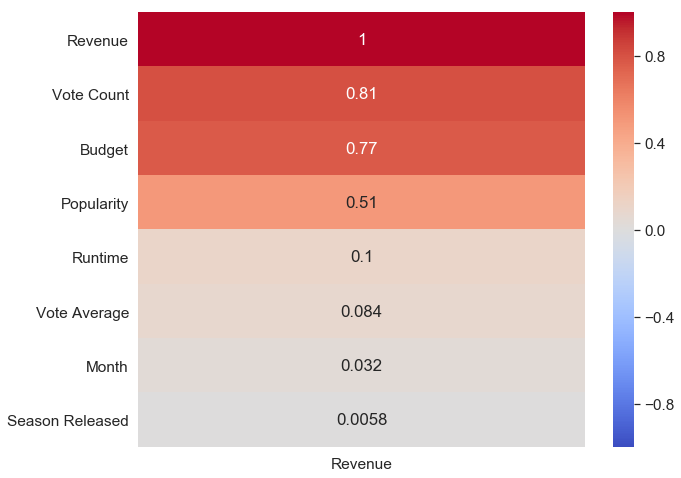

In [20]:
#Seaborn HeatMap
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(df.corr()[['Revenue']].sort_values('Revenue', ascending=False),vmin=-1,cmap='coolwarm',annot=True);

In [21]:
df.describe()

,Budget,Popularity,Revenue,Runtime,Vote Average,Vote Count,Month,Season Released
count,4.546300e+04,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000,45376.000000,45376.000000
mean,4.224579e+06,2.921478,1.120935e+07,94.128199,5.618207,109.897338,6.459075,2.499934
std,1.742413e+07,6.005414,6.433225e+07,38.407810,1.924216,491.310374,3.628160,1.178616
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000e+00,0.385948,0.000000e+00,85.000000,5.000000,3.000000,3.000000,1.000000
50%,0.000000e+00,1.127685,0.000000e+00,95.000000,6.000000,10.000000,7.000000,2.000000
75%,0.000000e+00,3.678902,0.000000e+00,107.000000,6.800000,34.000000,10.000000,4.000000
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,12.000000,4.000000


# Running Models

In [22]:
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
#Instantiate LR Model
model = LinearRegression()

In [24]:
#Sees max revenue
df['Revenue'].max()

2787965087.0

In [25]:
#Set new dataframe with columns I'll be using
df_1 = df[['Title', 'Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Revenue', 'Month', 'Season Released']]
df_1.head()

,Title,Popularity,Budget,Runtime,Vote Average,Vote Count,Revenue,Month,Season Released
0,Toy Story,21.946943,30000000.0,81.0,7.7,5415.0,373554033.0,10.0,4.0
1,Jumanji,17.015539,65000000.0,104.0,6.9,2413.0,262797249.0,12.0,1.0
2,Grumpier Old Men,11.712900,0.0,101.0,6.5,92.0,0.0,12.0,1.0
3,Waiting to Exhale,3.859495,16000000.0,127.0,6.1,34.0,81452156.0,12.0,1.0
4,Father of the Bride Part II,8.387519,0.0,106.0,5.7,173.0,76578911.0,2.0,1.0


In [26]:
#Drop all nulls and set new dataframe, confirm nulls gone
df_2 = df_1.dropna(axis = 0, how ='any') 
df_2.isnull().sum()

Title              0
Popularity         0
Budget             0
Runtime            0
Vote Average       0
Vote Count         0
Revenue            0
Month              0
Season Released    0
dtype: int64

In [27]:
#Set 
df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Month', 'Season Released']]
df_2.head()

,Title,Popularity,Budget,Runtime,Vote Average,Vote Count,Revenue,Month,Season Released
0,Toy Story,21.946943,30000000.0,81.0,7.7,5415.0,373554033.0,10.0,4.0
1,Jumanji,17.015539,65000000.0,104.0,6.9,2413.0,262797249.0,12.0,1.0
2,Grumpier Old Men,11.712900,0.0,101.0,6.5,92.0,0.0,12.0,1.0
3,Waiting to Exhale,3.859495,16000000.0,127.0,6.1,34.0,81452156.0,12.0,1.0
4,Father of the Bride Part II,8.387519,0.0,106.0,5.7,173.0,76578911.0,2.0,1.0


In [28]:
#Set variables
#Budget	Popularity	Revenue	Runtime	Vote Average	Vote Count
df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Month', 'Season Released']]
X = df_2[['Popularity', 'Budget', 'Runtime', 'Vote Average', 'Vote Count', 'Month', 'Season Released']]
y = df_2['Revenue']

In [29]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
#Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
#Gets score of model on training set
model.score(X_train, y_train)

0.749932156370116

In [32]:
#Set Predctions and get model score
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.742359564774392

In [33]:
#Gets model intercept
model.intercept_

1257242.290265074

In [34]:
#Gets model coefficients
model.coef_

array([-9.53936227e+04,  1.54708012e+00, -1.68210176e+04, -3.25158270e+05,
        7.12600647e+04,  1.97279319e+04, -3.04940985e+05])

Text(0, 0.5, 'Actual')

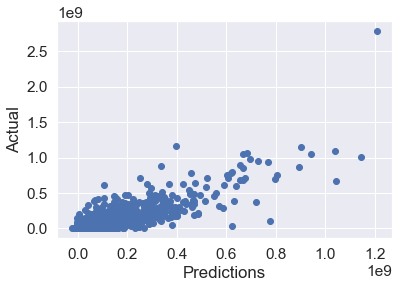

In [35]:
#Plot
import matplotlib.pyplot as plt
plt.scatter(y_predict, y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

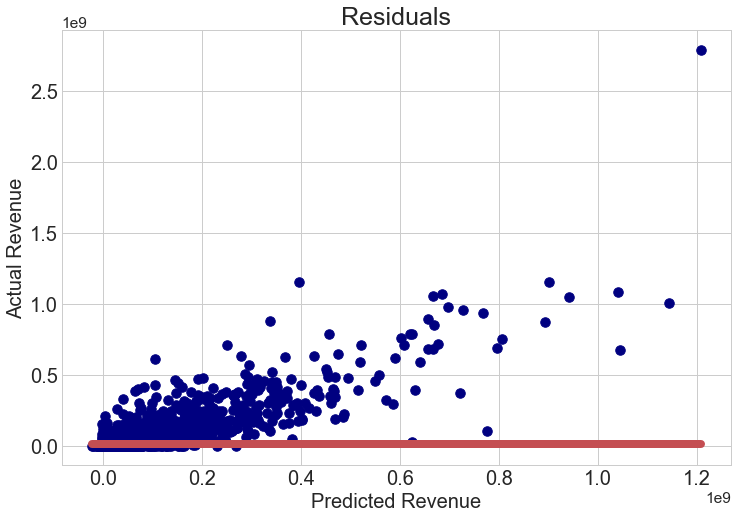

In [36]:
plt.figure(figsize = (12,8))
plt.style.use('seaborn-whitegrid')
plt.scatter(y_predict,y_test,c='navy',s=90);
plt.plot((np.min(y_predict), np.max(y_predict)),
        (np.mean(y_test), np.mean(y_test)),
       color='r',linewidth=8);

plt.title("Residuals",fontsize=25)
plt.xlabel("Predicted Revenue",fontsize=20)
plt.ylabel("Actual Revenue",fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [37]:
y_predict.shape

(13539,)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 8949624.777616628
Mean Squared Error: 1043453659215925.4
Root Mean Squared Error: 32302533.325049374


In [40]:
lm = sm.OLS(y_train, X_train)
lm_results = lm.fit()
print(lm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 1.408e+04
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:24:37   Log-Likelihood:            -5.9123e+05
No. Observations:               31591   AIC:                         1.182e+06
Df Residuals:                   31584   BIC:                         1.183e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Popularity      -9.642e+04   4.01e+04     

In [41]:
#Gets r2 score
r2_score(y_test, lm_results.predict(X_test))

0.7422772395643784

In [42]:
#Sets Interaction Terms
interaction_terms = df_2[['Vote Count', 'Budget']]

In [43]:
#Sets variables
X2 = interaction_terms
y2 = df_2['Revenue']

In [44]:
# Create linear regression
regr_it = LinearRegression()

# Fit the linear regression
model_it = regr_it.fit(X2, y2)

In [45]:
#Gets model coefficients
model_it.coef_

array([7.04873740e+04, 1.49378791e+00])

In [46]:
#Sets predictions
predictions_it = model_it.predict(X2)

Text(0, 0.5, 'Actual')

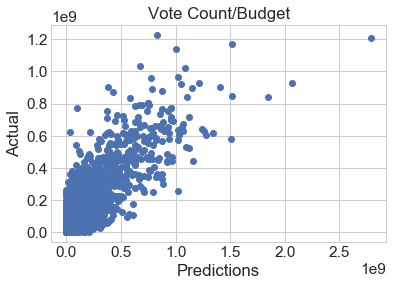

In [47]:
#Plot
plt.scatter(y2, predictions_it)
plt.title("Vote Count/Budget")
plt.xlabel("Predictions")
plt.ylabel("Actual")